![](http://nci.org.au/wp-content/themes/nci/img/img-logo-large.png)

-------

# Web Map Service (WCS)
## Requesting data subsets through NCI's GSKY Data Server
NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Coverage Service (WCS), which is a standard protocol for serving geospatial data in common formats such as NetCDF and GeoTIFF.  



### In this notebook:

#### How to use the Open Geospatial Consortium (OGC) Web Coverage Service (WCS) protocol through NCI's GSKY data server

- <a href='#getcoverage'>Constructing WCS GetCoverage Requests</a>
- <a href='#pythonwcs'>Using GKSY's WCS in Python</a>



#### The following material uses Geoscience Australia's Earth Observation Collection. Additional information about this data collection can be found [here](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/3a2cd509-0e82-4381-98c7-522756da533b).

---------

<br>


<a id='wcs'></a> 
## Constructing WCS Requests

GSKY's Web Coverage Service (WCS) allows users to request data or subsets of data in either NetCDF3 or GeoTIFF format. The request is make by constructing a **GetCoverage** URL, which is then used within a web browser to communicate to the GSKY Data Server. 

<a id='getcoverage'></a> 
#### For example, the GetCoverage request takes the following form:

> `http://130.56.242.16/ows?`<FONT COLOR="red">service</FONT>=WCS&<FONT COLOR="red">version</FONT>=1.0.0&<FONT COLOR="red">request</FONT>=GetCoverage&<FONT COLOR="red">coverage</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<br/><FONT COLOR="red">format</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">bbox</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">time</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">crs</FONT>=<FONT COLOR="#00cc99">value</FONT>value

where <FONT COLOR="red">red</FONT> indicates required fields, <FONT COLOR="blue">blue</FONT> are optional, and <FONT COLOR="00cc99">green</FONT> are where inputs values relevant to the dataset and user request need to be defined. 

**GetCoverage parameters:**

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WCS                                                          |
|version      |     Required        |  `1.0.0`                                                          |
|request      |     Required        | `GetCoverage`                                                     |
|coverage     |     Required        | `<variable>`                                                      |
|format       |     Required        | `GeoTIFF  `, `GeoTIFF_Float  `, `NetCDF3  `                       |
|bbox`*`         |     Required/Optional        | `<xmin,ymin,xmax,ymax>`                                           |
|time`*`         |     Required/Optional        | `<time_value>`                                                    |
|srs, or crs  |     Optional        | `<srs_value>` or `<crs_value>`                                    |

`*`For large files and/or files with a time dimension, these might be necessary. If `bbox` is not defined the entire spatial domain will be returned (if server limits allow) and if `time` is not specified, either the first or sometimes last timestep is returned. 

### WCS GetCapabilities and DescribeCoverage

#### Where do you find valid input values?

In order to contruct the **GetCoverage** URL, a **GetCapabilities** request can be made to the server. This requests returns a xml describing the available WCS parameters (metadata, services, and data) made available by NCI's GSKY server. Additional metadata information can also be requested about a specific coverage layer by making a **DescribeCoverage** request. 

**GetCapabilities example:**

> [http://130.56.242.16/ows?service=WCS&version=1.0.0&request=GetCapabilities<br/>](http://130.56.242.16/ows?service=WCS&version=1.0.0&request=GetCapabilities)

<img src="./gsky_wcs1.png">



**DescribeCoverage example:**
> [http://130.56.242.16/ows?service=WCS&version=1.0.0&coverage=LS5:NBAR:TRUE&request=DescribeCoverage<br/>](http://130.56.242.16/ows?service=WCS&version=1.0.0&coverage=LS5:NBAR:TRUE&request=DescribeCoverage)

<img src="./gsky_wcs2.png">

<br>
<br>
<br>

### GetCoverage Request
Using the information returned from the GetCapabilities and DescribeCoverage requests, a GetMap URL can be constructed and then entered into the address bar of any web browser.  

#### Example GetCoverage (NetCDF format):

> [http://gsky.nci.org.au/ows?<br/>
service=WCS&<br/>
coverage=LS7:NBAR:TRUE&<br/>
service=WCS&<br/>
crs=EPSG:4326&<br/>
format=NetCDF&<br/>
request=GetCoverage&<br/>
height=256&<br/>
width=256&<br/>
version=1.0.0&<br/>
bbox=148,-37,151,-34&<br/>
time=1999-08-05T00:00:00.000Z<br/>
](http://130.56.242.16/ows?SERVICE=WCS&service=WCS&crs=EPSG:4326&format=NetCDF&request=GetCoverage&height=256&width=256&version=1.0.0&bbox=148,-37,151,-34&coverage=LS7:NBAR:TRUE&time=1999-08-05T00:00:00.000Z)


#### Example GetCoverage (GeoTIFF format):

> [http://gsky.nci.org.au/ows?<br/>
service=WCS&<br/>
coverage=LS7:NBAR:TRUE&<br/>
service=WCS&<br/>
crs=EPSG:4326&<br/>
format=GeoTIFF&<br/>
request=GetCoverage&<br/>
height=256&<br/>
width=256&<br/>
version=1.0.0&<br/>
bbox=148,-37,151,-34&<br/>
time=1999-08-05T00:00:00.000Z<br/>
](http://130.56.242.16/ows?SERVICE=WCS&service=WCS&crs=EPSG:4326&format=GeoTIFF&request=GetCoverage&height=256&width=256&version=1.0.0&bbox=148,-37,151,-34&coverage=LS7:NBAR:TRUE&time=1999-08-05T00:00:00.000Z)

<br></br>

<a id='pythonwcs'></a>
## Using GSKY's WCS in Python
Many tools are available to perform the above steps less manually. In particular, Python's OWSLib library can be used with GSKY's WCS. 

### The following libraries will need to be imported for the below example. 

In [1]:
from owslib.wcs import WebCoverageService
from PIL import Image
%matplotlib inline

### To start, we will need the base GSKY server URL:

In [2]:
gsky_url = 'http://130.56.242.16/ows?service=WCS&version=1.0.0&request=GetCapabilities'

### Now using OWSLib, you can begin by inspecting the service metadata:


In [3]:
wcs = WebCoverageService(gsky_url, version='1.0.0')

#### Find out the available data layers that can be requested:

In [4]:
for layer in list(wcs.contents):
    print "Layer Name:", layer
    print "Title:", wcs[layer].title, '\n'

Layer Name: LS5:NBAR:TRUE
Title: DEA Landsat 5 surface reflectance true colour 

Layer Name: global:c6:monthly_anom_frac_cover
Title: GEOGLAM Anomaly Fractional Cover C6 

Layer Name: LS7:NBART:FALSE
Title: DEA Landsat 7 terrain corrected surface reflectance false colour 

Layer Name: hltc:high:tc
Title: DEA High Tide Composite 25m v2.0 true colour 

Layer Name: LS8:NBAR:FALSE
Title: DEA Landsat 8 surface reflectance false colour 

Layer Name: item:relative
Title: DEA Intertidal Extents Model Relative Layer 25m v2.0 

Layer Name: global:c6:monthly_decile_total_cover
Title: GEOGLAM Monthly Decile Total Cover C6 

Layer Name: global:c6:total_cover
Title: GEOGLAM Total Cover C6 

Layer Name: LS5:NBAR:FALSE
Title: DEA Landsat 5 surface reflectance false colour 

Layer Name: global:c5:total_cover
Title: GEOGLAM Total Cover C5 

Layer Name: hltc:low:fc
Title: DEA Low Tide Composite 25m v2.0 false colour 

Layer Name: hltc:low:tc
Title: DEA Low Tide Composite 25m v2.0 true colour 

Layer Name

#### We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer. 

In [5]:
layer = "LS7:NBAR:TRUE"

In [6]:
print(wcs[layer].abstract)

This product has been corrected to remove the influences of the atmosphere, the time of year and satellite view angles using the methods described in Li et al. 2010 https://doi.org/10.1109/JSTARS.2010.2042281. Landsat 7 Enhanced Thematic Mapper (ETM+) data is available from May 1999 and onwards. Please note that images from 1st of June 2003 are affected by the failure of scan line corrector which results in strips of missing data. More detailed information about the surface reflectance product suite produced using Digital Earth Australia including CCBY4.0 is available at  http://dx.doi.org/10.4225/25/5a7a76d2e129e. This service provides access to Landsat 7 ETM+ surface reflectance data. The true colour composite is composed of wavelengths of light as seen by the human eye. The image composites are made from images acquired within a 16 day period, and may include clouds.


#### Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request). 

In [7]:
print "CRS Options: "
crs = wcs[layer].supportedCRS
print '\t', crs, '\n'
    
print "Bounding Box: "
bbox = wcs[layer].boundingBoxWGS84
print '\t', bbox, '\n'
    
print "Time Positions: "
time = wcs[layer].timepositions
print '\t', time[:10], '\n'

CRS Options: 
	[urn:ogc:def:crs:OGC::CRS84] 

Bounding Box: 
	(-180.0, -90.0, 180.0, 90.0) 

Time Positions: 
	['1999-05-01T00:00:00.000Z', '1999-05-17T00:00:00.000Z', '1999-06-02T00:00:00.000Z', '1999-06-18T00:00:00.000Z', '1999-07-04T00:00:00.000Z', '1999-07-20T00:00:00.000Z', '1999-08-05T00:00:00.000Z', '1999-08-21T00:00:00.000Z', '1999-09-06T00:00:00.000Z', '1999-09-22T00:00:00.000Z'] 



### Now let's use the information above to construct and make GetCoverage requests
The below sections will demonstrate both a request in GeoTIFF and NetCDF formats.

#### We'll need to define a bounding box for our request:

In [8]:
subset_bbox = (148, -37, 151, -34)

#### OWSLib's library can now be used to make the GetCoverage request:

In [9]:
output = wcs.getCoverage(identifier=layer, 
                         time=[wcs[layer].timepositions[6]],
                         bbox=subset_bbox,format='GeoTIFF',
                         crs='EPSG:4326', width=256, height=256)

#### To view the above constructed URL:

In [10]:
print(output.geturl())

http://130.56.242.16/ows?crs=EPSG%3A4326&service=WCS&format=GeoTIFF&request=GetCoverage&height=256&width=256&version=1.0.0&BBox=148%2C-37%2C151%2C-34&Coverage=LS7%3ANBAR%3ATRUE&time=1999-08-05T00%3A00%3A00.000Z


#### Write the result to a file:

In [11]:
filename = './gsky_wcs.tiff'
with open(filename, 'wb') as f:
    f.write(output.read())

#### And if we'd like to confirm the result, we can open and view the GeoTIFF with the Python GDAL library for example:

In [12]:
import gdal
import matplotlib.pyplot as plt 
%matplotlib inline

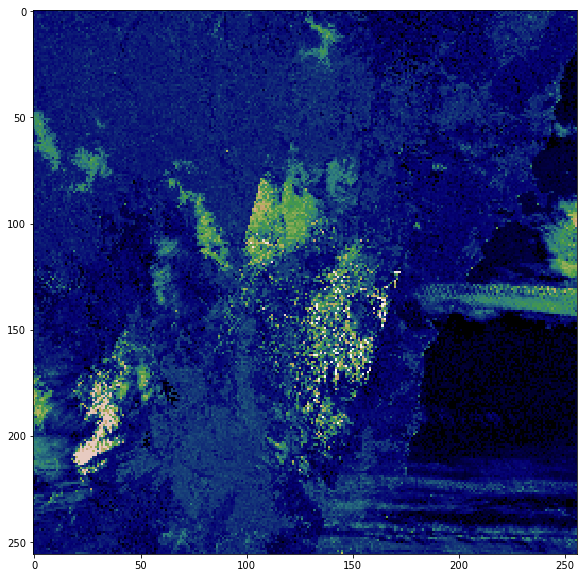

In [13]:
ds = gdal.Open(filename)
band = ds.GetRasterBand(1).ReadAsArray()

fig = plt.figure(figsize=(10,10))
plt.imshow(band, cmap='gist_earth')

#### To request a coverage returned as in the NetCDF format, a similar GetCoverage request is constructed with the format parameter now specifying the NetCDF option. 

In [14]:
output = wcs.getCoverage(identifier=layer, 
                         time=[wcs[layer].timepositions[6]],
                         bbox=subset_bbox,format='NetCDF',
                         crs='EPSG:4326', width=256, height=256)

In [15]:
print(output.geturl())

http://130.56.242.16/ows?crs=EPSG%3A4326&service=WCS&format=NetCDF&request=GetCoverage&height=256&width=256&version=1.0.0&BBox=148%2C-37%2C151%2C-34&Coverage=LS7%3ANBAR%3ATRUE&time=1999-08-05T00%3A00%3A00.000Z


#### Again, write the output to a file to save:

In [16]:
filename = './gsky_wcs.nc'
with open(filename, 'wb') as f:
    f.write(output.read())

#### To confirm or inspect the contents of the NetCDF file, libraries such as NetCDF4 Python or GDAL can be used. 

In [17]:
from netCDF4 import Dataset

[u'Band1', u'Band2', u'Band3', u'crs', u'lat', u'lon']


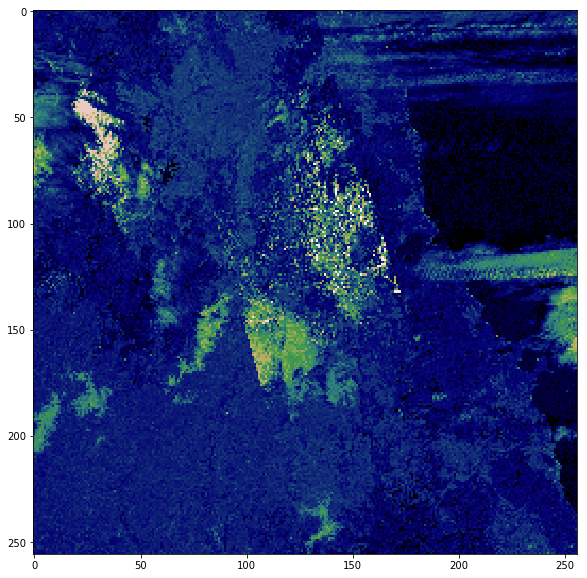

In [18]:
with Dataset(filename) as ds:
    print(ds.variables.keys())
    
    band = ds['Band1']

    fig = plt.figure(figsize=(10,10))
    plt.imshow(band, cmap='gist_earth')

<br>
<br>
<br>


--------
**For more information on the OGC WCS standard specifications and the Python OWSLib package:** <br \>
http://www.opengeospatial.org/standards/wcs <br \>
https://geopython.github.io/OWSLib/#wms <br \>
